In [1]:
from cytoreactors.control.MPC import DutyCycleController
import cytoreactors.modeling.DIFF_model_all_growers_with_reservoir as model
from cytoreactors.modeling.simulation import simulate, simulate_analytic, light_profile_to_traj
from time import time
import matplotlib.pyplot as plt

In [2]:
pars = model.default_model_pars.copy()
pars

{'mu': 0.4, 'k_diff': 8}

In [3]:
controller = DutyCycleController(target=0.9, 
                                 model=model, 
                                 model_pars=pars,
                                 initial_state=[0], 
                                 dc_period_hrs=0.5, 
                                 n_cycles_horizon=10)

In [4]:
all_lps = []
t0 = time()
for i in range(10):
    dcs = controller.optimize()
    print(time()-t0)
    t0= time()
    lp = controller.dcs_to_light_profile(dcs[:2])
    all_lps += lp
    t,y,_,_ = simulate_analytic(controller.model, controller.model_pars, lp, controller.current_state, n_evals=21)
    controller.current_state = y.transpose()[-1]

0.037462711334228516
0.02200484275817871
0.04131579399108887
0.0312809944152832
0.031249284744262695
0.0317845344543457
0.021656274795532227
0.046877384185791016
0.03372907638549805
0.019156455993652344


In [5]:
t,y,_,_ = simulate_analytic(controller.model, controller.model_pars, all_lps, [0], n_evals=21)
tl,l = light_profile_to_traj(all_lps)

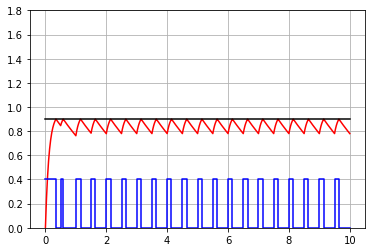

In [7]:
plt.plot(t,y[-1],'r')
plt.plot([0,10],[controller.target,controller.target],'k')
plt.plot(tl,l/100,'b')
plt.ylim([0,controller.target*2])
plt.grid()